In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

## TRAIN DATASET

In [2]:
df = pd.read_csv(r"D:\vishal\Imarticus\CodSoft\Movie Genre\train_data.txt",
                 sep=":::", header=None, names=["ID", "Title", "Genre", "Description"])

df.head(3)

,ID,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...


#### Removing irrelavant column

In [3]:
data=df.drop("ID", axis=1)
data.head()

,Title,Genre,Description
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


#### Copying dataset for furthur analysis

In [4]:
data_Target=data.copy()
data_Target.head()

,Title,Genre,Description
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


# Deleting some Rows 

In [6]:
data_dup = data
data_dup.shape

(54214, 3)

* System gets hang coz of large Dataset

In [7]:
data=pd.DataFrame(data.Description)
data.head()

,Description
0,Listening in to a conversation between his do...
1,A brother and sister with a past incestuous r...
2,As the bus empties the students for their fie...
3,To help their unemployed father make ends mee...
4,The film's title refers not only to the un-re...


### Data Cleaning or Pre-Processing

#### Step 1 :- Lower case

In [8]:
data.Description = data.Description.str.lower()

In [9]:
data.iloc[1,0]

' a brother and sister with a past incestuous relationship have a current murderous relationship. he murders the women who reject him and she murders the women who get too close to him.'

#### Step 2 :- Punctuation

In [10]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [11]:
def remove_punctuation(Description):
    Description_nopunt="".join([c for c in Description if c not in string.punctuation])
    return Description_nopunt

In [12]:
data.iloc[1,0]

' a brother and sister with a past incestuous relationship have a current murderous relationship. he murders the women who reject him and she murders the women who get too close to him.'

In [13]:
data['Description'] = data['Description'].apply(lambda x : remove_punctuation(x))

In [14]:
data.iloc[1,0]

' a brother and sister with a past incestuous relationship have a current murderous relationship he murders the women who reject him and she murders the women who get too close to him'

#### Step 3:-  Remove url

* \S == Returns a match where the string DOES NOT contain a white space character ( http / www.)
* (+) == one or more occurance

In [15]:
data['Description'] = data['Description'].str.replace(r'http\S+|www.\S+','',case=False)
data.iloc[1,0]

' a brother and sister with a past incestuous relationship have a current murderous relationship he murders the women who reject him and she murders the women who get too close to him'

#### Step 4:-  Remove Number

In [16]:
data.iloc[1,0]

' a brother and sister with a past incestuous relationship have a current murderous relationship he murders the women who reject him and she murders the women who get too close to him'

* \d == Returns a match where the string contains digits (numbers from 0-9)
* (+) == one or more occurance

In [17]:
data['Description'] = data['Description'].str.replace('\d+','')

In [18]:
data.iloc[1,0]

' a brother and sister with a past incestuous relationship have a current murderous relationship he murders the women who reject him and she murders the women who get too close to him'

#### Step 5:-  Removing Stop Words

In [19]:
# Import stopwords with nltk.
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [20]:
data.iloc[1,0]

' a brother and sister with a past incestuous relationship have a current murderous relationship he murders the women who reject him and she murders the women who get too close to him'

In [21]:
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
data['Description'] = data['Description'].apply(lambda x: ' '.join([word for word in x.split() #
                                                      if word not in (stop)]))

In [22]:
data.iloc[1,0]

'brother sister past incestuous relationship current murderous relationship murders women reject murders women get close'

#### Step 6:-  Common Words

In [23]:
import re # replace of words
words = set(nltk.corpus.words.words())

In [24]:
#Apply a second round of cleaning
def clean_text_round2(Description):
    Description =  re.sub(r"\b[a-zA-Z]\b", "", Description) ## 1 alphabet like a or s
    Description =  re.sub(r"\b[a-zA-Z][a-zA-Z]\b", "", Description)  ## 2 alphabet like ab or ad 
    Description =  " ".join(w for w in nltk.wordpunct_tokenize(Description)  ## this will give you tokens 
                   if w.lower() in words)  #    
    return Description

In [25]:
# Let's take a look at the updated text
data['Description']=data['Description'].apply(lambda x : clean_text_round2(x))
data = pd.DataFrame(data.Description.apply(clean_text_round2))
data.iloc[1,0]

'brother sister past incestuous relationship current murderous relationship reject get close'

#### Step 7:- Lemmatization

In [26]:
from nltk.stem import WordNetLemmatizer 
import nltk
# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

In [27]:
def lemmatize_Description(Description):
    return [lemmatizer.lemmatize(w,"v") for w in w_tokenizer.tokenize(Description)]

In [28]:
data.iloc[1,0]

'brother sister past incestuous relationship current murderous relationship reject get close'

In [29]:
data['Description'] = data.Description.apply(lambda x :' '.join(lemmatize_Description(x)))
data.iloc[1,0]

'brother sister past incestuous relationship current murderous relationship reject get close'

#### Step 8:-  Strip extra whitespace

In [30]:
data.iloc[1,0]

'brother sister past incestuous relationship current murderous relationship reject get close'

In [31]:
data['Description'] = (data['Description'].astype("str").str.rstrip())
data.iloc[1,0]

'brother sister past incestuous relationship current murderous relationship reject get close'

* Finished Data Cleaning

### Term Document Matrix

In [32]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english', max_features=5000)
data_cv = cv.fit_transform(data.Description)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())

# One of the required inputs is a term-document matrix
tdm = data_dtm.transpose()
tdm.head(5)

,0,1,2,3,4,5,6,7,8,9,...,54204,54205,54206,54207,54208,54209,54210,54211,54212,54213
abandon,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abandonment,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abduction,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ability,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
tdm['freq'] = tdm.sum(axis=1)
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,54205,54206,54207,54208,54209,54210,54211,54212,54213,freq
abandon,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,849
abandonment,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,44
abduction,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,58
ability,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,363
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1252


In [34]:
tdm.reset_index(inplace=True)
tdm.head()

,index,0,1,2,3,4,5,6,7,8,...,54205,54206,54207,54208,54209,54210,54211,54212,54213,freq
0,abandon,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,849
1,abandonment,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,44
2,abduction,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,58
3,ability,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,363
4,able,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1252


In [35]:
tdm1 = tdm[["index","freq"]]
tdm1.rename(columns = {'index':'Word'}, inplace = True)
tdm1.sort_values(by='freq',ascending=False,inplace=True)
tdm1.head()

,Word,freq
2547,life,17304
1719,film,13041
2937,new,11524
4959,world,10352
4990,young,10093


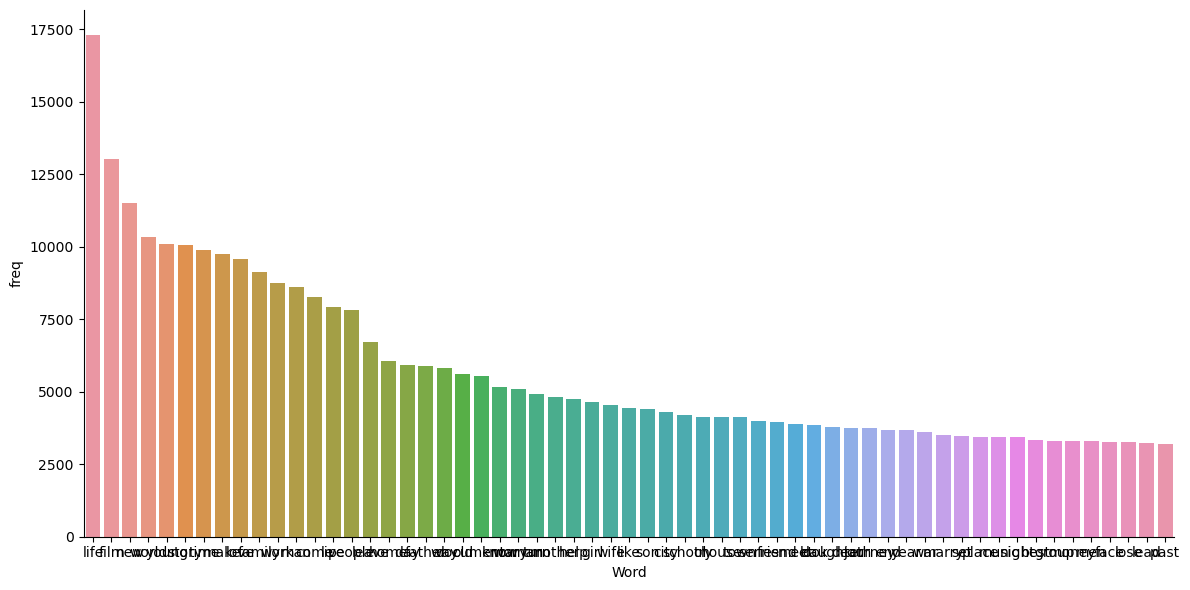

In [36]:
import seaborn as sns
w = tdm1[tdm1['freq'] >=3000] 
fg = sns.factorplot(x='Word', y='freq',
                       size=6,  aspect=2,
                       kind='bar', 
                       data=w)

In [37]:
data.head()

,Description
0,listen conversation doctor nobody courage tell...
1,brother sister past incestuous relationship cu...
2,bus field trip museum natural history little t...
3,help unemployed father make meet twin sister g...
4,title unrecovered grind zero also state nation...


In [38]:
data_dup.head(3)

,Title,Genre,Description
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...


In [39]:
data['Genre']=data_dup.Genre
data.head()

,Description,Genre
0,listen conversation doctor nobody courage tell...,drama
1,brother sister past incestuous relationship cu...,thriller
2,bus field trip museum natural history little t...,adult
3,help unemployed father make meet twin sister g...,drama
4,title unrecovered grind zero also state nation...,drama


# Train

In [40]:
data_dtm['Genre']=data_dup.Genre
data_dtm.head()

,abandon,abandonment,abduction,ability,able,aboard,aboriginal,abortion,abound,abroad,...,younger,youth,youthful,youve,zany,zero,zombie,zone,zoo,Genre
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,drama
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,thriller
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,adult
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,drama
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,drama


In [41]:
train=data_dtm
train.head()

,abandon,abandonment,abduction,ability,able,aboard,aboriginal,abortion,abound,abroad,...,younger,youth,youthful,youve,zany,zero,zombie,zone,zoo,Genre
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,drama
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,thriller
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,adult
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,drama
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,drama


In [42]:
unique_values = train['Genre'].unique()
print(unique_values)

[' drama ' ' thriller ' ' adult ' ' documentary ' ' comedy ' ' crime '
 ' reality-tv ' ' horror ' ' sport ' ' animation ' ' action ' ' fantasy '
 ' short ' ' sci-fi ' ' music ' ' adventure ' ' talk-show ' ' western '
 ' family ' ' mystery ' ' history ' ' news ' ' biography ' ' romance '
 ' game-show ' ' musical ' ' war ']


#### Label encoding on Train

In [43]:
from sklearn.preprocessing import LabelEncoder

train = train.apply(LabelEncoder().fit_transform)
train.head()

,abandon,abandonment,abduction,ability,able,aboard,aboriginal,abortion,abound,abroad,...,younger,youth,youthful,youve,zany,zero,zombie,zone,zoo,Genre
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,24
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,8


#### Data Partition on Train

In [44]:
#Dividing data into X_train y_train

X_train = train.drop(['Genre'],axis=1)
y_train = train['Genre']

## TEST DATASET

In [45]:
df = pd.read_csv(r"D:\vishal\Imarticus\CodSoft\Movie Genre\test_data_solution.txt",
                 sep=":::", header=None, names=["ID", "Title", "Genre", "Description"])
df.head()

,ID,Title,Genre,Description
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [46]:
data=df.drop("ID", axis=1)
data.head()

,Title,Genre,Description
0,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,Er nu zhai (1955),drama,Before he was known internationally as a mart...


#### Making copy of dataset

In [47]:
data_Target=data.copy()
data_Target.head()

,Title,Genre,Description
0,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,Er nu zhai (1955),drama,Before he was known internationally as a mart...


# Deleting some Rows 

In [49]:
data_duplicate = data
data_duplicate.shape

(54200, 3)

In [50]:
data=pd.DataFrame(data.Description)
data.head()

,Description
0,"L.R. Brane loves his life - his car, his apar..."
1,"Spain, March 1964: Quico is a very naughty ch..."
2,One year in the life of Albin and his family ...
3,"His father has died, he hasn't spoken with hi..."
4,Before he was known internationally as a mart...


### Data Cleaning or Pre-Processing

#### Step 1 :- Lower case

In [51]:
data.Description = data.Description.str.lower()

#### Step 2 :- Punctuation

In [52]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [53]:
def remove_punctuation(Description):
    Description_nopunt="".join([c for c in Description if c not in string.punctuation])
    return Description_nopunt

In [54]:
data['Description'] = data['Description'].apply(lambda x : remove_punctuation(x))

#### Step 3 :- Remove url

* \S == Returns a match where the string DOES NOT contain a white space character ( http / www.)
* (+) == one or more occurance

In [55]:
data['Description'] = data['Description'].str.replace(r'http\S+|www.\S+','',case=False)
data.iloc[1,0]

' spain march 1964 quico is a very naughty child of three belonging to a wealthy middleclass family since cristinas birth he feels he has lost the privileged position of prince of the house for his eight months old sister so with his brother juan who is eight years old and is quite disobedient spend their time committing prank after prank causing the resulting anger of his mother the nanny and the old housemaid the rest of the family members are two much older brothers his resigned mother and a retrograde father of authoritarian ideas but many years have passed and the civil war that won the despot don pablo is simply for their children dads war'

#### Step 4 :- Remove Number

* \d == Returns a match where the string contains digits (numbers from 0-9)
* (+) == one or more occurance

In [56]:
data['Description'] = data['Description'].str.replace('\d+','')

#### Step 5 :- Removing Stop Words

In [57]:
# Import stopwords with nltk.
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [58]:
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
data['Description'] = data['Description'].apply(lambda x: ' '.join([word for word in x.split() #
                                                      if word not in (stop)]))

#### Step 6 :- Common Words

In [59]:
import re # replace of words
words = set(nltk.corpus.words.words())

#### Step 7 :- Lemmatization

In [60]:
from nltk.stem import WordNetLemmatizer 
import nltk
# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

In [61]:
def lemmatize_Description(Description):
    return [lemmatizer.lemmatize(w,"v") for w in w_tokenizer.tokenize(Description)]

In [62]:
data['Description'] = data.Description.apply(lambda x :' '.join(lemmatize_Description(x)))
data.iloc[1,0]

'spain march quico naughty child three belong wealthy middleclass family since cristinas birth feel lose privilege position prince house eight months old sister brother juan eight years old quite disobedient spend time commit prank prank cause result anger mother nanny old housemaid rest family members two much older brothers resign mother retrograde father authoritarian ideas many years pass civil war despot pablo simply children dads war'

#### Step 8 :- Strip extra whitespace

In [63]:
data['Description'] = (data['Description'].astype("str").str.rstrip())
data.iloc[1,0]

'spain march quico naughty child three belong wealthy middleclass family since cristinas birth feel lose privilege position prince house eight months old sister brother juan eight years old quite disobedient spend time commit prank prank cause result anger mother nanny old housemaid rest family members two much older brothers resign mother retrograde father authoritarian ideas many years pass civil war despot pablo simply children dads war'

* Finished Data Cleaning

### Term Document Matrix

In [64]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english', max_features=5000)
data_cv = cv.fit_transform(data.Description)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())

# One of the required inputs is a term-document matrix
tdm = data_dtm.transpose()
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,54190,54191,54192,54193,54194,54195,54196,54197,54198,54199
aaron,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abandon,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abduct,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abilities,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ability,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
tdm['freq'] = tdm.sum(axis=1)
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,54191,54192,54193,54194,54195,54196,54197,54198,54199,freq
aaron,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,147
abandon,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,996
abduct,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,228
abilities,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,173
ability,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,373


In [66]:
tdm.reset_index(inplace=True)
tdm.head()

,index,0,1,2,3,4,5,6,7,8,...,54191,54192,54193,54194,54195,54196,54197,54198,54199,freq
0,aaron,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,147
1,abandon,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,996
2,abduct,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,228
3,abilities,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,173
4,ability,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,373


In [67]:
tdm1 = tdm[["index","freq"]]
tdm1.rename(columns = {'index':'Word'}, inplace = True)
tdm1.sort_values(by='freq',ascending=False,inplace=True)
tdm1.head(5)

,Word,freq
2606,life,17384
1714,film,16319
2633,live,14480
2722,make,11845
3030,new,11530


In [68]:
data.head()

,Description
0,lr brane love life car apartment job especiall...
1,spain march quico naughty child three belong w...
2,one year life albin family shepherd north tran...
3,father die hasnt speak brother years serious c...
4,know internationally martial arts superstar br...


In [69]:
data_duplicate.head(3)

,Title,Genre,Description
0,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...


In [70]:
data['Genre']=data_duplicate.Genre
data.head()

,Description,Genre
0,lr brane love life car apartment job especiall...,thriller
1,spain march quico naughty child three belong w...,comedy
2,one year life albin family shepherd north tran...,documentary
3,father die hasnt speak brother years serious c...,drama
4,know internationally martial arts superstar br...,drama


# Test

In [71]:
data_dtm['Genre']=data_Target.Genre
data_dtm.head()

,aaron,abandon,abduct,abilities,ability,able,aboard,aboriginal,abortion,abroad,...,youtube,youve,zealand,zero,zoe,zombie,zombies,zone,zoo,Genre
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,thriller
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,comedy
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,documentary
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,drama
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,drama


In [72]:
test=data_dtm
test.head()

,aaron,abandon,abduct,abilities,ability,able,aboard,aboriginal,abortion,abroad,...,youtube,youve,zealand,zero,zoe,zombie,zombies,zone,zoo,Genre
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,thriller
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,comedy
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,documentary
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,drama
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,drama


In [73]:
unique_values = test['Genre'].unique()
print(unique_values)

[' thriller ' ' comedy ' ' documentary ' ' drama ' ' horror ' ' short '
 ' western ' ' family ' ' sport ' ' romance ' ' war ' ' game-show '
 ' biography ' ' adult ' ' talk-show ' ' action ' ' music ' ' crime '
 ' animation ' ' sci-fi ' ' adventure ' ' reality-tv ' ' fantasy '
 ' mystery ' ' history ' ' news ' ' musical ']


# Label encoding on Test

In [74]:
from sklearn.preprocessing import LabelEncoder

test=test.apply(LabelEncoder().fit_transform)
test.head()

,aaron,abandon,abduct,abilities,ability,able,aboard,aboriginal,abortion,abroad,...,youtube,youve,zealand,zero,zoe,zombie,zombies,zone,zoo,Genre
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,24
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8


### Data Partition of Test

In [75]:
#Dividing data into X_test y_test

X_test = test.drop(['Genre'],axis=1)
y_test = test['Genre']

## Model Building 

### 1) Logistic Reression Classifier

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression().fit(X_train, y_train)

In [77]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,abandon,abandonment,abduction,ability,able,aboard,aboriginal,abortion,abound,abroad,...,younger,youth,youthful,youve,zany,zero,zombie,zone,zoo,Genre
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,24
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,8


#### Prediction on Train Data

In [78]:
train['Predicted'] = logreg.predict(X_train)
train.head()

,abandon,abandonment,abduction,ability,able,aboard,aboriginal,abortion,abound,abroad,...,youth,youthful,youve,zany,zero,zombie,zone,zoo,Genre,Predicted
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,8
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,24,24
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,8
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,8,7


In [79]:
from sklearn.metrics import classification_report
print(classification_report(train['Predicted'],train['Genre']))

              precision    recall  f1-score   support

           0       0.74      0.85      0.79      1136
           1       0.85      0.96      0.91       523
           2       0.71      0.92      0.80       601
           3       0.75      0.93      0.83       403
           4       0.63      1.00      0.77       167
           5       0.74      0.73      0.73      7512
           6       0.67      0.93      0.78       362
           7       0.88      0.81      0.84     14201
           8       0.82      0.71      0.76     15742
           9       0.64      0.92      0.75       544
          10       0.73      0.94      0.82       250
          11       0.93      0.98      0.95       183
          12       0.65      0.99      0.79       161
          13       0.86      0.87      0.86      2176
          14       0.86      0.93      0.89       681
          15       0.73      0.95      0.83       213
          16       0.68      0.95      0.79       230
          17       0.84    

#### Prediction on Test Data

In [80]:
test = pd.concat([X_test,y_test],axis=1)
test.head()

,aaron,abandon,abduct,abilities,ability,able,aboard,aboriginal,abortion,abroad,...,youtube,youve,zealand,zero,zoe,zombie,zombies,zone,zoo,Genre
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,24
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8


In [81]:
test['Predicted'] = logreg.predict(X_test)
test.head()

,aaron,abandon,abduct,abilities,ability,able,aboard,aboriginal,abortion,abroad,...,youve,zealand,zero,zoe,zombie,zombies,zone,zoo,Genre,Predicted
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,24,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,5
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,7,8
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,7
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,9


In [82]:
print(classification_report(test['Predicted'],test['Genre']))

              precision    recall  f1-score   support

           0       0.01      0.02      0.02       688
           1       0.02      0.01      0.02       759
           2       0.01      0.01      0.01       749
           3       0.01      0.01      0.01       370
           4       0.00      0.00      0.00       231
           5       0.25      0.14      0.18     13136
           6       0.01      0.01      0.01       345
           7       0.22      0.26      0.24     11122
           8       0.21      0.24      0.23     11970
           9       0.01      0.01      0.01       874
          10       0.00      0.00      0.00       109
          11       0.00      0.00      0.00        11
          12       0.00      0.00      0.00        68
          13       0.03      0.05      0.04      1514
          14       0.02      0.03      0.02       480
          15       0.00      0.00      0.00        17
          16       0.00      0.01      0.00       119
          17       0.01    

# Finish

In [90]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier # Extrame GB

In [91]:
model_parameters = {'n_estimators': [10, 50], # number of tress
                    'max_depth':    [3, 5],      # maximum branches in tree
                    'learning_rate':[0.8, 0.6],
                    'reg_lambda':[0,1]} #parent 

In [92]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
# Gridsearch the parameters to find the best parameters. Using L2 penalty
model = XGBClassifier()   # Lamda = 0 
gscv = GridSearchCV(estimator=model, 
                    param_grid=model_parameters, 
                    cv=10, 
                    verbose=1, 
                    n_jobs=-1,
                    scoring='accuracy')

gscv.fit(X_train, y_train)  ## Model building

Fitting 10 folds for each of 16 candidates, totalling 160 fits


MemoryError: Unable to allocate 1.82 GiB for an array with shape (5000, 48792) and data type int64

In [ ]:
print('The best parameter are -', gscv.best_params_)

In [ ]:
# Re-fit the model with the best parameters
final_mod = XGBClassifier(**gscv.best_params_)
final_mod.fit(x_train, y_train)

In [ ]:
final_mod.get_xgb_params()

In [ ]:
train = pd.concat([X_train,y_train],axis=1)
train['Predicted'] = final_mod.predict(X_train)  # MODEL = Final_mod
train.head()    

In [ ]:
print('Classification report for train data is : \n',
      classification_report(y_train, train['Predicted']))

In [ ]:
test = pd.concat([X_test,y_test],axis=1)
test['Predicted'] = final_mod.predict(X_test)  # MODEL = Final_mod
test.head()

In [ ]:
print('Classification report for test data is : \n',
      classification_report(y_test, test['Predicted']))